#Linear regression and seaborn on movie budgets and financial performance records

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print('hello world')

hello world


In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

In [5]:
cwd = os. getcwd()


In [6]:
cwd

'c:\\Users\\pc\\OneDrive\\Documents\\VS Code'

In [7]:
data.head(6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
5,4250,12/30/1925,Ben-Hur,"$3,900,000","$9,000,000","$9,000,000"


In [8]:
len(data)

5391

In [9]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [10]:
len(data.index)

5391

In [11]:
data.count()

Rank                     5391
Release_Date             5391
Movie_Title              5391
USD_Production_Budget    5391
USD_Worldwide_Gross      5391
USD_Domestic_Gross       5391
dtype: int64

In [32]:
data.size

32346

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [14]:
len(data.columns)

6

data.count


In [15]:
data.count()


Rank                     5391
Release_Date             5391
Movie_Title              5391
USD_Production_Budget    5391
USD_Worldwide_Gross      5391
USD_Domestic_Gross       5391
dtype: int64

In [16]:
data.isnull()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5386,False,False,False,False,False,False
5387,False,False,False,False,False,False
5388,False,False,False,False,False,False
5389,False,False,False,False,False,False


In [17]:
#to check for the number of null values in a dataframe
data.isnull().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [18]:
#alternatively we can check the null values by
data.isna().values.any()

False

In [19]:
#to check for duplicated rows in the data
data[data.duplicated()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


In [20]:
duplicated_rows = data[data.duplicated()]
data.duplicated().sum()
print('The Duplicated rows include:-')
duplicated_rows

The Duplicated rows include:-


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


In [21]:
#checking for the data types in the columns.
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

In [22]:
#Convert the `Release_Date` column to a Pandas Datetime type.
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [23]:
data.duplicated().sum()

0

In [27]:
data.head(9)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,1916-05-09,Intolerance,"$385,907",$0,$0
2,5230,1916-12-24,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1925-01-01,The Big Parade,"$245,000","$22,000,000","$11,000,000"
5,4250,1925-12-30,Ben-Hur,"$3,900,000","$9,000,000","$9,000,000"
6,4630,1927-12-08,Wings,"$2,000,000",$0,$0
7,5141,1929-01-02,The Broadway Melody,"$379,000","$4,358,000","$2,800,000"
8,4240,1930-01-01,Hell's Angels,"$4,000,000",$0,$0


In [30]:
data.shape

(5391, 6)

In [ ]:
data.dtypes

To remove $ and , characters from the budget and revenue columns we use a nested loop; like below

In [41]:
characters = [',', '$']
columns = ['USD_Production_Budget', 'USD_Worldwide_Gross','USD_Domestic_Gross']

for col in columns:
    for char in characters:

        data[col] = data[col].astype(str).str.replace(char, "")

    data[col] = pd.to_numeric(data[col])

C:\Users\pc\AppData\Local\Temp\ipykernel_8164\1619798042.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [46]:
data.USD_Domestic_Gross.mean()

41235519.44314598

In [47]:
data.USD_Worldwide_Gross.mean()

88855421.96271564

In [49]:
min_domestic = data.USD_Domestic_Gross.min()
min_wordwide = data.USD_Worldwide_Gross.min()
min_domestic
min_wordwide

0

In [50]:
min_domestic

0

In [51]:
min_wordwide

0

In [52]:
data.USD_Production_Budget.quantile()

17000000.0

TO CHECK FOr the statistics of different columns using the describe function 

In [53]:
data.describe()


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


The film was the lowest budget film in the dataset

In [54]:
data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [55]:
data[data.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


FILMS THAT GROSSED ZERO DOMESTICALLY

In [58]:
zero_domestic_gross_movies = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed zero domestically are {len(zero_domestic_gross_movies)}')
zero_domestic_gross_movies.sort_values('USD_Production_Budget', ascending = False)


Number of films that grossed zero domestically are 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [59]:
zero_worldwide_gross_movies = data[data.USD_Worldwide_Gross == 0]
print(f"The movies that grossed $0 worldwidely are {len(zero_worldwide_gross_movies)}")
zero_worldwide_gross_movies.sort_values('USD_Production_Budget', ascending = False)

The movies that grossed $0 worldwidely are 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


 To find which films made money internationally, but had zero box office revenue in the United States

In [61]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]

In [65]:
international_releases.sort_values('USD_Production_Budget', ascending = False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
...,...,...,...,...,...,...
4862,5206,2015-03-24,Along the Roadside,250000,3234,0
5113,5267,2015-12-31,Lumea e a mea,168000,29827,0
4535,5276,2013-12-31,Speak No Evil,150000,32927,0
4072,5319,2011-12-31,Absentia,70000,8555,0


In [66]:
print(f'the movies that grossed internationally but not domestically were:{len(international_releases)}')

the movies that grossed internationally but not domestically were:155


Removing the unreleased films - that were not released at the time the data was collected



In [68]:
scrape_date = pd.Timestamp('2018-5-1')
scrape_date

Timestamp('2018-05-01 00:00:00')

In [72]:
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unrelease films: {len(future_releases)}')
future_releases.sort_values('USD_Production_Budget', ascending = False)

Number of unrelease films: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0


from here we go ahead and drop the unreleased films 

In [75]:
clean_data = data.drop(future_releases.index)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5384 non-null   int64         
 1   Release_Date           5384 non-null   datetime64[ns]
 2   Movie_Title            5384 non-null   object        
 3   USD_Production_Budget  5384 non-null   int64         
 4   USD_Worldwide_Gross    5384 non-null   int64         
 5   USD_Domestic_Gross     5384 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.5+ KB


In [77]:
clean_data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11","31,038,476.84","88,970,947.21","41,289,131.75"
std,"1,555.79","40,440,041.47","168,536,755.89","66,055,507.64"
min,1.00,"1,100.00",0.00,0.00
25%,"1,351.75","5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50","17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25","40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


To calculate the percentage of films that did not break even at the box office -- films where the costs exceed the worldwide gross revenue

In [79]:
money_losing = clean_data.loc[data.USD_Production_Budget > data.USD_Worldwide_Gross]
len(money_losing)/len(clean_data)

0.37277117384843983

alternatively, we can use the data.query function as below

In [82]:
money_losing2 = clean_data.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing2.shape[0]/clean_data.shape[0]

0.37277117384843983

DATA VISUALIZATION USING THE SEABORN 

In [ ]:
pip install seaborn

In [85]:
import seaborn as sns

To create a scatterplot using seaborn we:

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

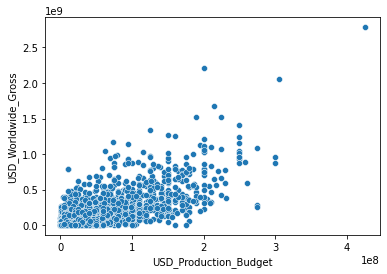

In [89]:
sns.scatterplot(x=data.USD_Production_Budget, y= data.USD_Worldwide_Gross)

To increase the size of our plot using matplotlib

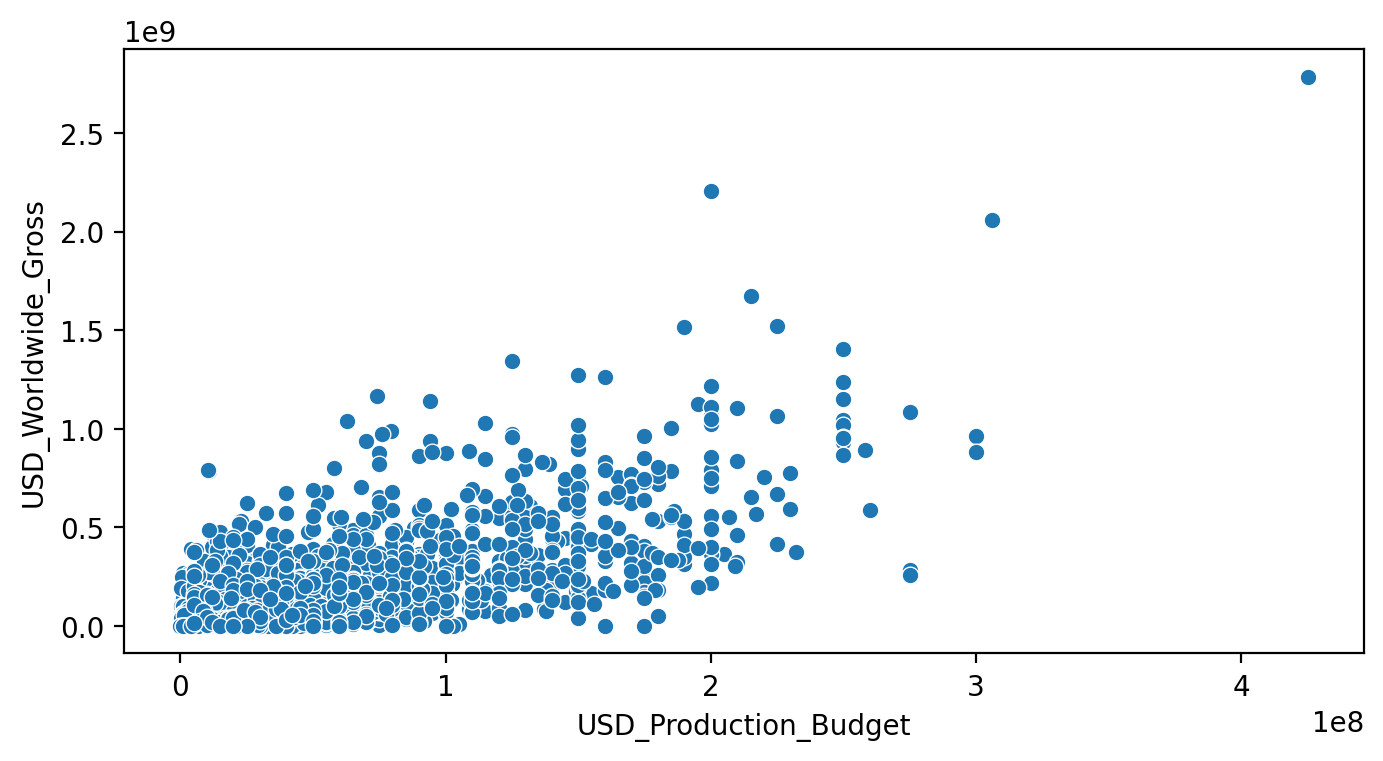

In [90]:
plt.figure(figsize=(8, 4), dpi =200,)

sns.scatterplot(x=data.USD_Production_Budget, y= data.USD_Worldwide_Gross)

plt.show()

to set the limits on the axes and change the labels.



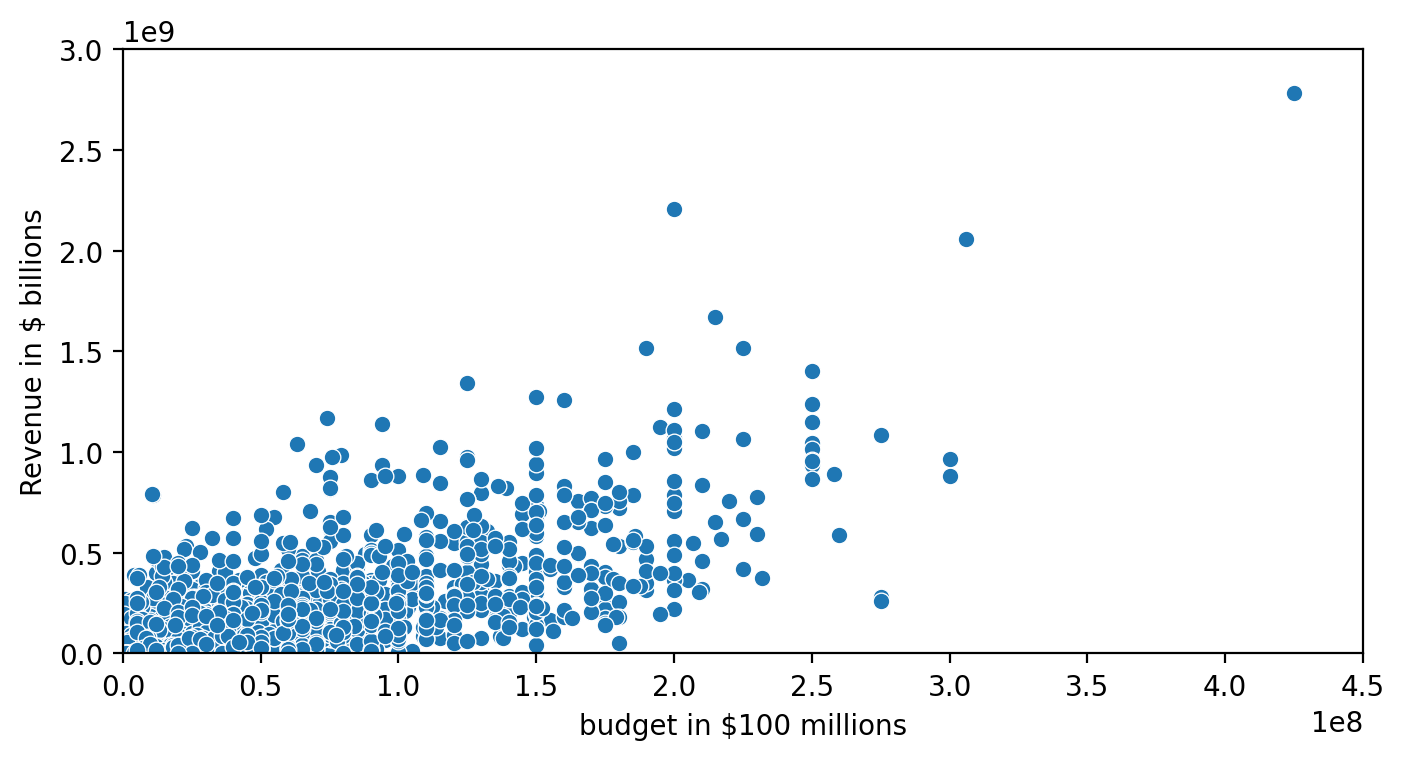

In [105]:
plt.figure(figsize=(8, 4), dpi=200,)

ax = sns.scatterplot(x=clean_data.USD_Production_Budget, y=clean_data.USD_Worldwide_Gross)

ax.set(ylim=(0, 3000000000), xlim = (0, 450000000), ylabel = 'Revenue in $ billions', xlabel = 'budget in $100 millions')


plt.show()


hue and size parameters of seaborn will allow us to colour the data and change their size

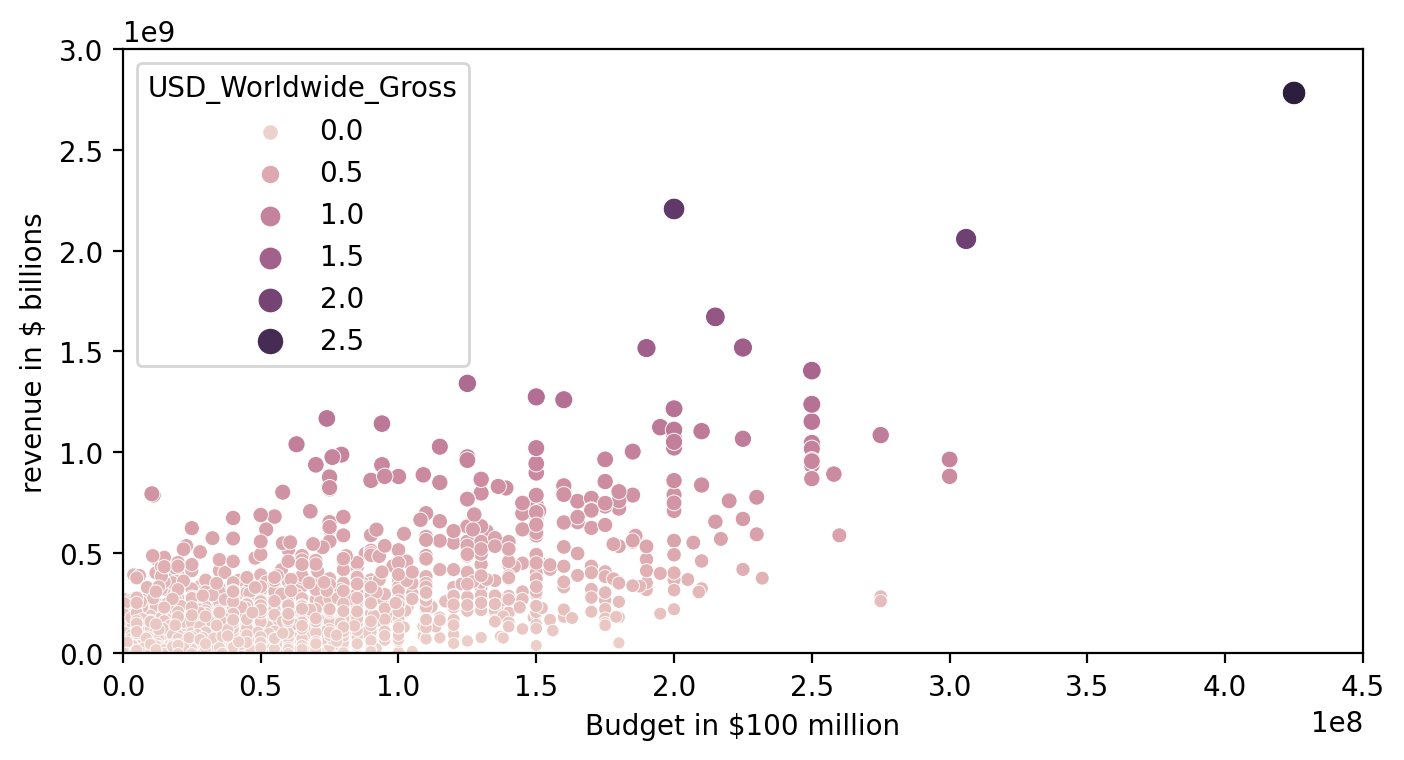

In [107]:
plt.figure(figsize = (8, 4), dpi = 200)

ax = sns.scatterplot(data = clean_data, x = 'USD_Production_Budget', y = 'USD_Worldwide_Gross', hue = 'USD_Worldwide_Gross', size= 'USD_Worldwide_Gross')

ax.set(ylim=(0,3000000000), xlim =(0, 450000000), ylabel = 'revenue in $ billions', xlabel = 'Budget in $100 million')

plt.show()

In [102]:
clean_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


the industry has grown massively, producing many more films than before.


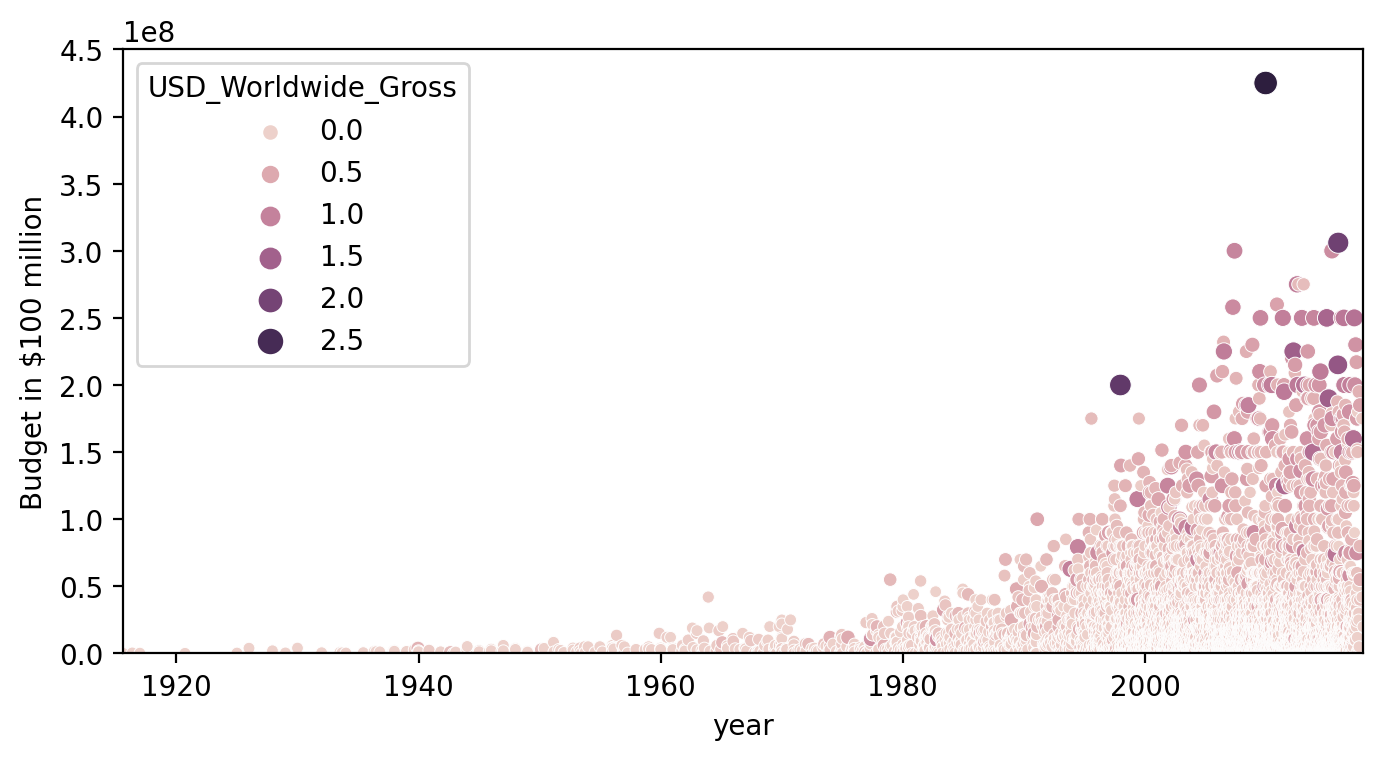

In [110]:
plt.figure(figsize = (8, 4), dpi = 200)

ax = sns.scatterplot(data = clean_data, x = 'Release_Date', y = 'USD_Production_Budget', hue = 'USD_Worldwide_Gross', size= 'USD_Worldwide_Gross')

ax.set(ylim=(0, 450000000), xlim=(clean_data.Release_Date.min(), clean_data.Release_Date.max()), ylabel='Budget in $100 million', xlabel= 'year')

plt.show()

 To Convert Years to Decades in the 'Release_Date' column; Then we can extract all the years from the DatetimeIndex

In [118]:
release_years = pd.DatetimeIndex(clean_data.Release_Date).year
print(f'this are the years the films were released{len(release_years)}')

this are the years the films were released5384


Using Floor Division // to Convert Years to Decades
we will use the floor division by 10 and then multiplication by 10 to convert the release year to the release decade:
We can do this for all the years and then add the decades back as a column.

In [121]:
decades = release_years//10*10
clean_data['decades'] = decades

In [122]:
clean_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


creating two dataframes containing both the old and new movies

In [126]:
old_films = clean_data.loc[clean_data['decades'] <= 1969]

In [129]:
len(old_films)


153

In [130]:
old_films.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960
152,4195,1969-12-19,Topaz,4000000,6000000,6000000,1960


In [131]:
new_films = clean_data.loc[clean_data.decades >= 1970]

In [133]:
new_films.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0,2010


In [134]:
len(new_films)

5231

In [138]:
old_films.sort_values('USD_Production_Budget', ascending=False)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


Plotting Linear Regressions with Seaborn Let's visualise the relationship between the movie budget and the worldwide revenue using linear regression.

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

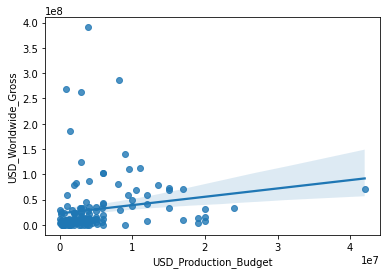

In [140]:
sns.regplot(data = old_films, x = 'USD_Production_Budget', y = 'USD_Worldwide_Gross')

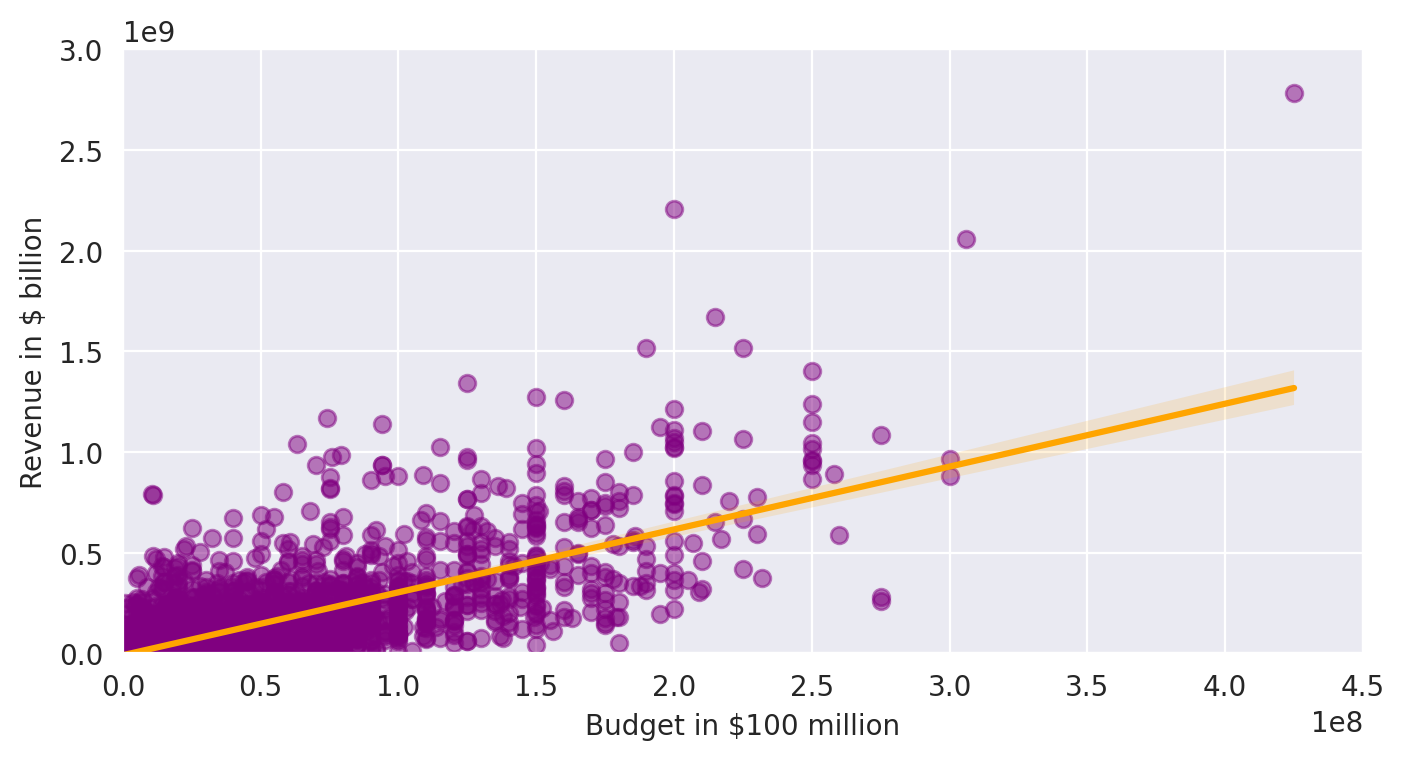

In [163]:
plt.figure(figsize = (8, 4), dpi = 200)
with sns.axes_style('darkgrid'):
    ay = sns.regplot(data = new_films, x = 'USD_Production_Budget', y = 'USD_Worldwide_Gross', color = 'purple', scatter_kws = {'alpha' : 0.5}, line_kws = {'color': 'orange'})
    ay.set(xlim = (0, 450000000) , ylim =(0, 3000000000) , xlabel = 'Budget in $100 million', ylabel = 'Revenue in $ billion')

plt.show()

Use scikit-learn to Run Your Own Regression

In [164]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 377.7 kB/s eta 0:00:00
     ------------------------------------ 307.0/307.0 KB 179.2 kB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'C:\Users\pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
regression = LinearRegression()

In [168]:
X = pd.DataFrame(new_films, columns = ['USD_Production_Budget'])
Y = pd.DataFrame(new_films, columns = ['USD_Worldwide_Gross'])

In [171]:
model = regression.fit(X, Y)

In [175]:
print(regression.coef_, regression.intercept_, regression.score(X,Y))

[[3.12259592]] [-8650768.00661038] 0.5577032617720403


In [180]:
x1 = pd.DataFrame(old_films, columns = ['USD_Production_Budget'])
y1 = pd.DataFrame(old_films, columns = ['USD_Worldwide_Gross'])


In [177]:
model = LinearRegression()

In [181]:
model.fit(x1, y1)

LinearRegression()

In [182]:
print(model.coef_, model.intercept_, model.score(x1, y1))

[[1.64771314]] [22821538.63508039] 0.02937258620576877
